<a href="https://colab.research.google.com/github/Mohamed-Diagne/AI-Driven-Real-Time-Crypto-Advisor/blob/main/Credit_Scoring_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📊 Explainable AI for Credit Risk Management - Credit Scoring Project**

## 🎯 Project Overview

The objective of this project is to build a **credit scoring model** that is both accurate and interpretable.

In credit risk, explainability is essential to:
- Understand **why** a loan is accepted or rejected.
- Help risk managers and clients justify credit decisions.
- Detect and mitigate potential biases (e.g. age, income, credit history).
- Ensure compliance with regulatory requirements (fairness, transparency).

We will follow a rigorous approach to:
1. Prepare and explore the dataset.
2. Build robust and explainable models.
3. Analyze and interpret predictions with a focus on **false positives** (i.e., wrongly rejected clients).
4. Provide business-driven insights based on model explanations.


---
### Features

- **person_age**: Applicant's age.
- **person_income**: Applicant's annual income.
- **person_home_ownership**: Home ownership status (RENT, MORTGAGE, OWN, OTHER).
- **person_emp_length**: Employment length in years.
- **loan_intent**: Purpose of the loan.
- **loan_grade**: Creditworthiness grade (A to G).
- **loan_amnt**: Loan amount requested.
- **loan_int_rate**: Loan interest rate.
- **loan_status**: Target → 0: Non-default, 1: Default.
- **loan_percent_income**: Loan amount as a percentage of income.
- **cb_person_default_on_file**: Historical defaults (Y/N).
- **cb_person_cred_hist_length**: Length of credit history.

# **📥 Step 1 - Import Libraries and Load Data**


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import missingno as msno
from IPython.display import display

# Load dataset (with correct separator)
data = pd.read_csv("/content/credit_risk_dataset.csv", sep=";")

# Preview data
display(data.head())


person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [ ]:
# General info
data.info()

# Shape
display(f"Dataset shape: {data.shape}")

# Missing values per column
display(data.isnull().sum())

# Descriptive statistics
display(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


'Dataset shape: (32581, 12)'

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

<Axes: >

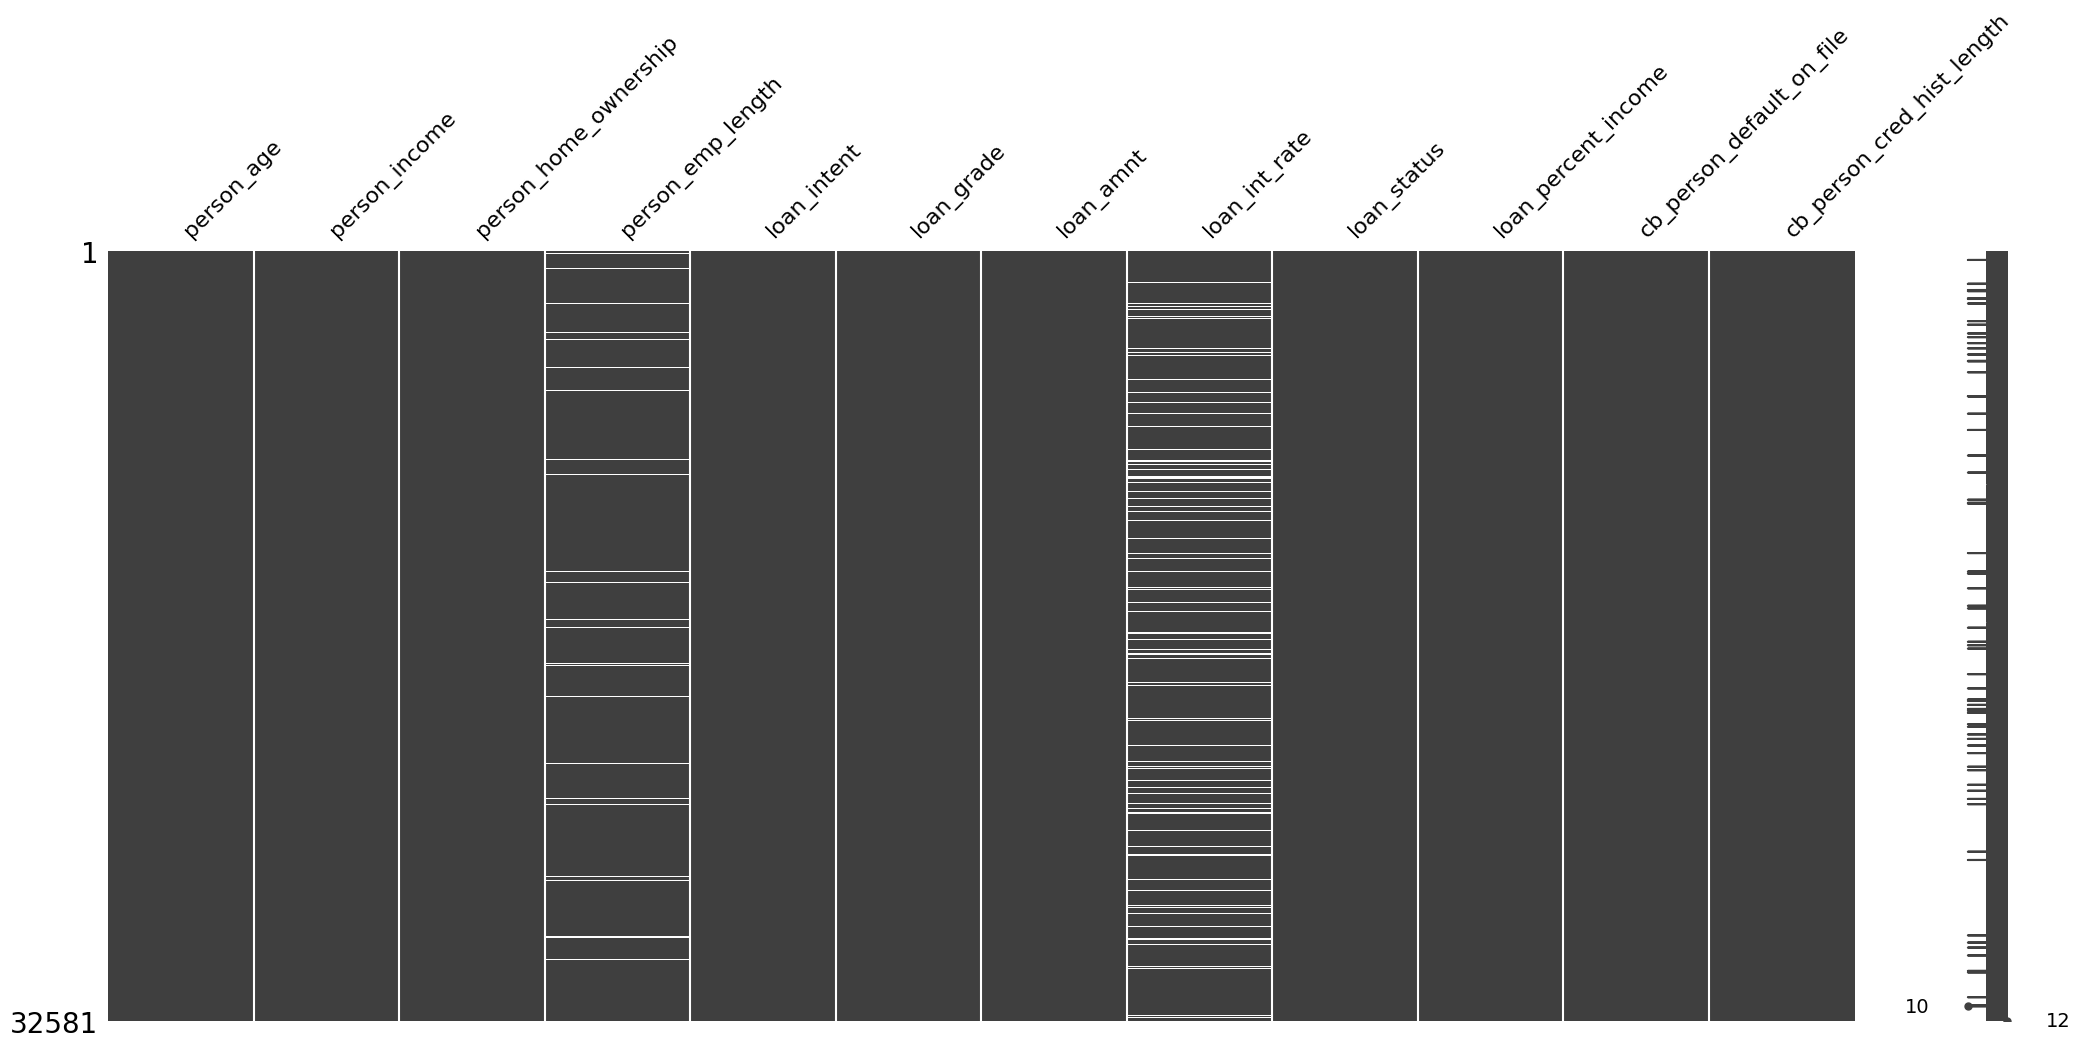

In [ ]:
# Visual missing values
msno.matrix(data)

# **📈 Step 2 - Exploratory Data Analysis (EDA)**

## Why EDA?

Before building models, it is essential to explore and understand the dataset:

- Identify data quality issues (missing values, outliers).
- Understand target variable distribution (loan defaults).
- Explore relationships between features and loan default risk.
- Detect potential biases or unfair patterns.

A rigorous EDA helps in building robust and explainable models.


<ipython-input-4-5e98ba934e33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=data, palette='viridis')


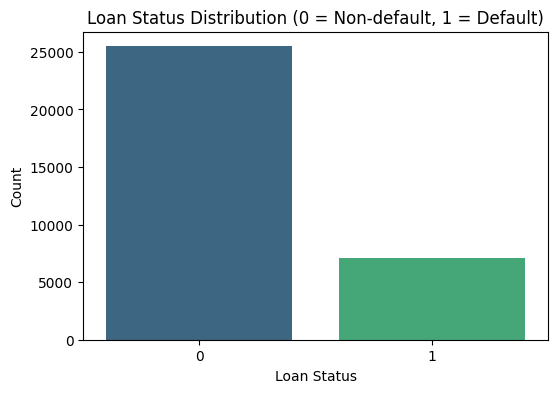

Default rate: 21.82%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot loan_status distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=data, palette='viridis')
plt.title("Loan Status Distribution (0 = Non-default, 1 = Default)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Calculate percentage
default_rate = data["loan_status"].mean()
print(f"Default rate: {default_rate:.2%}")


The dataset shows that the proportion of defaults (`loan_status = 1`) is around 21.8%.

There is a **class imbalance**, which is common in credit risk datasets.  
Later, we will handle this to avoid biased models.


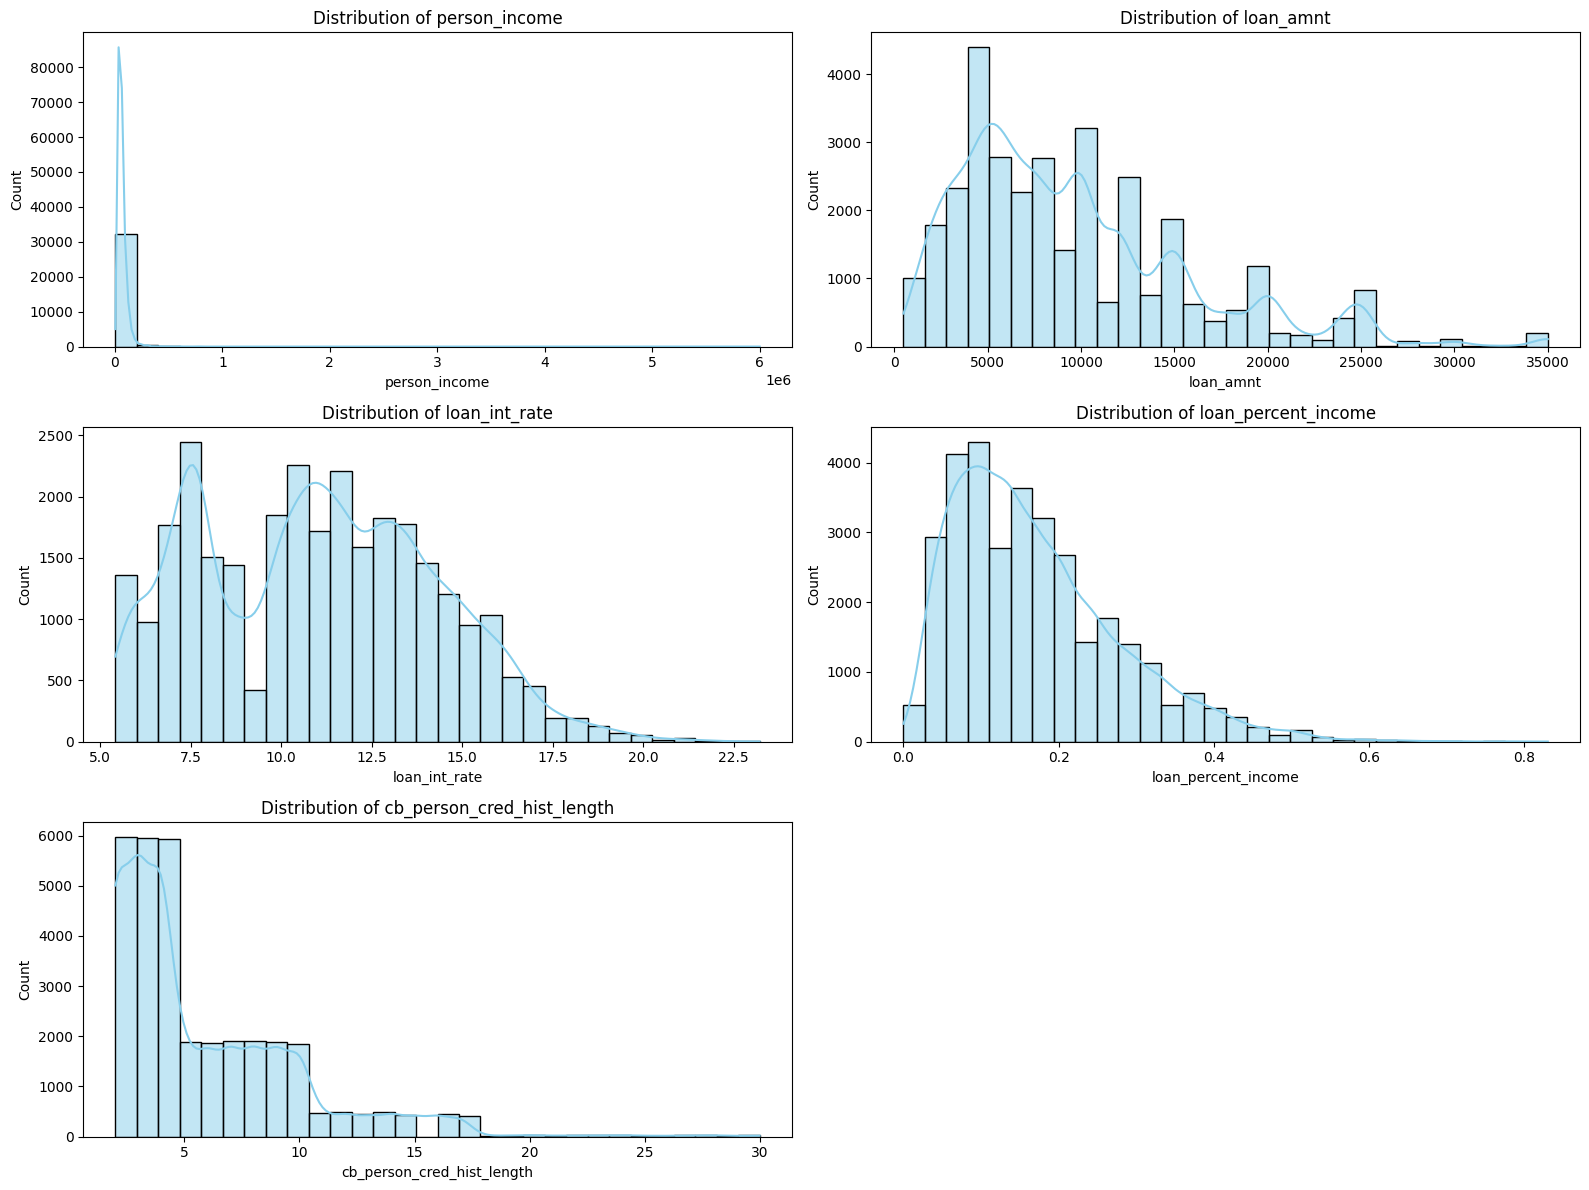

In [ ]:
num_features = ["person_income", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]

# Plot histograms
plt.figure(figsize=(16,12))

for idx, feature in enumerate(num_features):
    plt.subplot(3, 2, idx+1)
    sns.histplot(data[feature], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


Observations:

- **Age** shows a peak around young adults, but outliers exist → needs cleaning.
- **Income** is highly skewed → standardization or log transformation may help.
- **Loan Amount** is right-skewed → typical in credit data.
- **Loan Interest Rate** is well distributed.
- **Loan Percent Income** → few applicants take loans above 40% of income.
- **Credit History Length** → concentrated between 2 and 10 years.


<ipython-input-6-e1bb61dafec2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='pastel')
<ipython-input-6-e1bb61dafec2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='pastel')
<ipython-input-6-e1bb61dafec2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='pastel')
<ipython-input-6-e1bb61dafec2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `

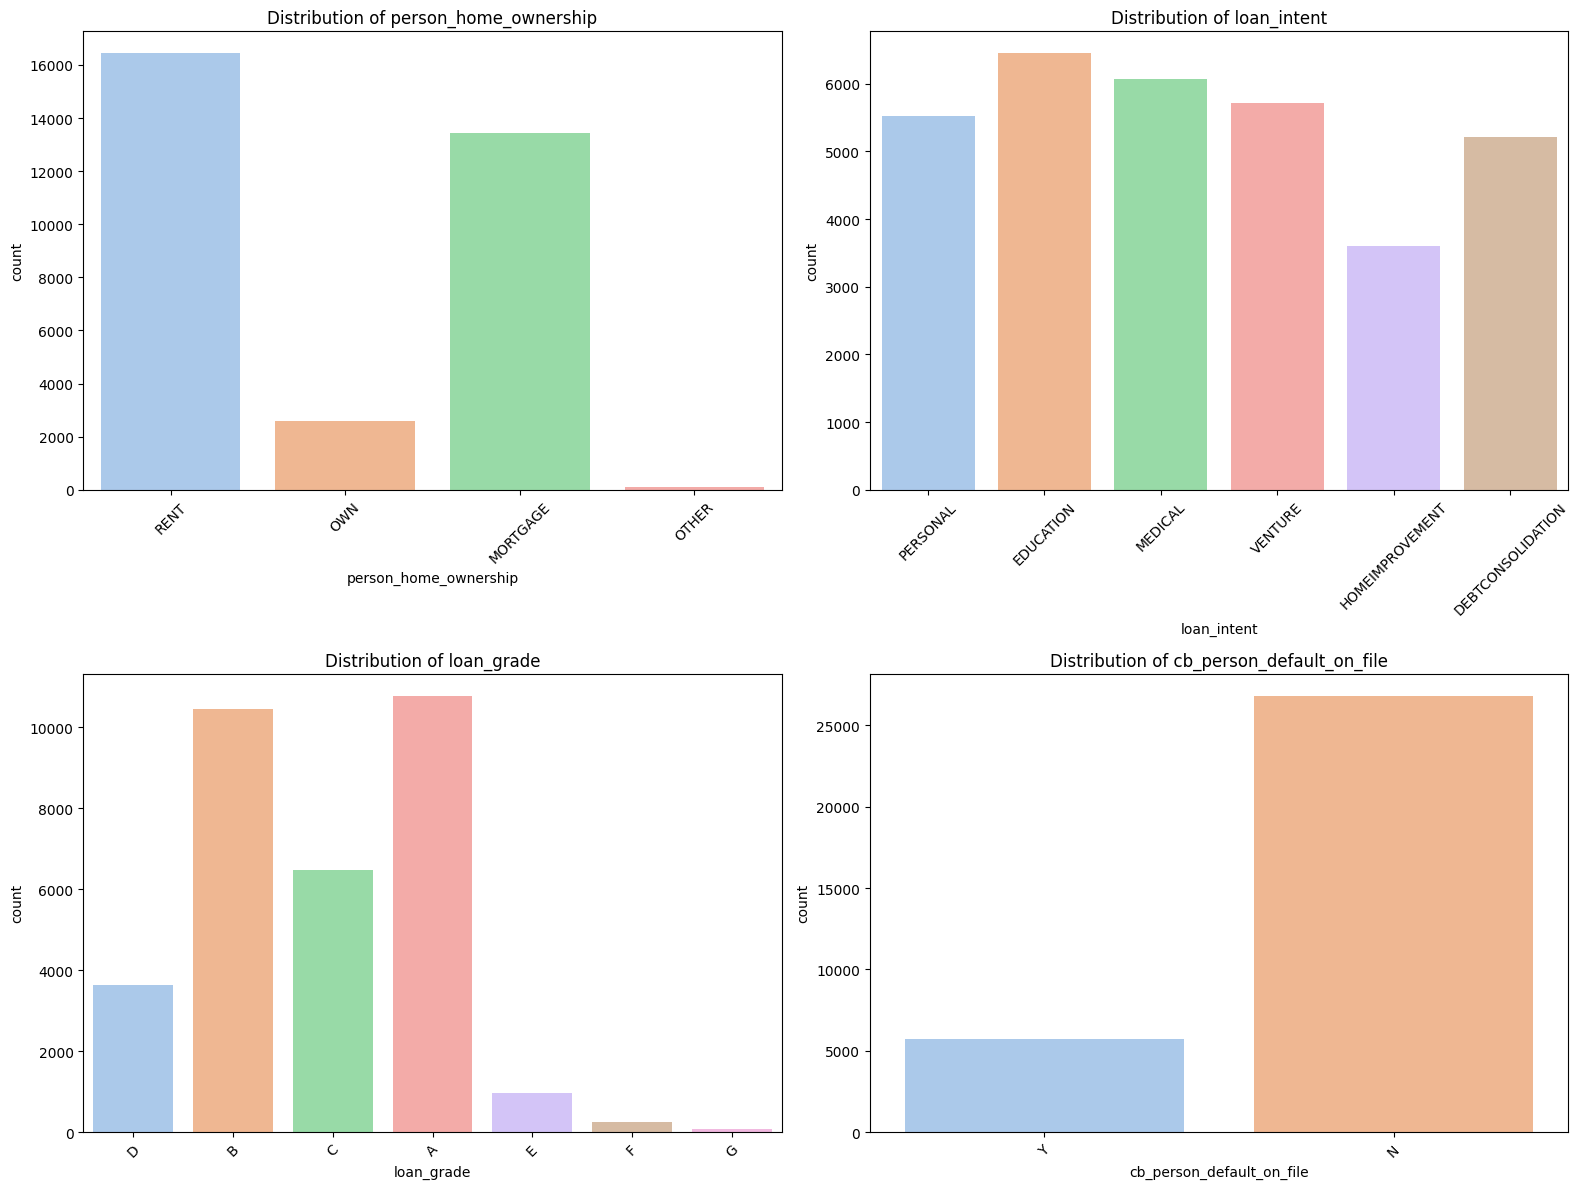

In [ ]:
cat_features = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

plt.figure(figsize=(16,12))

for idx, feature in enumerate(cat_features):
    plt.subplot(2, 2, idx+1)
    sns.countplot(x=feature, data=data, palette='pastel')
    plt.title(f"Distribution of {feature}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Observations:

- **Home Ownership**: RENT and MORTGAGE dominate → higher credit risk group.
- **Loan Intent**: Loans are requested for various reasons → medical, education, personal.
- **Loan Grade**: Mostly A, B and C → typical risk profile in consumer lending.
- **Historical Default (Credit Bureau)**: Majority have no prior defaults → good sign.


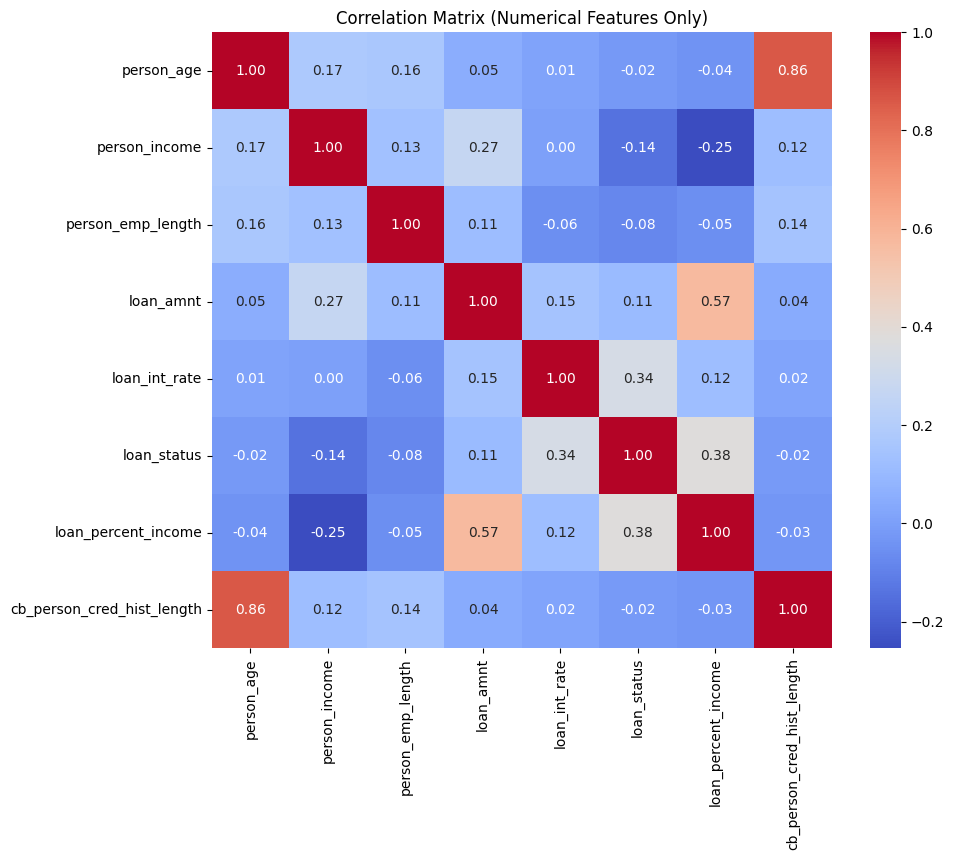

In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Calculate correlation
corr = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

**Y-Data Profiling Report**

In [ ]:
#  Installer ydata-profiling si besoin
!pip install ydata-profiling --quiet

#  Importer la bibliothèque
from ydata_profiling import ProfileReport

#  Générer le rapport
profile = ProfileReport(data, title="📊 Credit Risk Dataset Profiling", explorative=True)

#  Affichage dans Colab
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 19.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations:

- **Loan Amount** and **Loan Percent Income** → highly correlated → expected.
- **Loan Interest Rate** shows moderate correlation with Loan Status → key predictor.
- Age, Income, Employment Length → weak correlation → models may capture non-linear effects.
- No strong multicollinearity → good for predictive modeling.


# **🧹 Step 3 - Data Cleaning and Preprocessing**

Before modeling, we need to clean and prepare the dataset to:

- Handle missing values carefully (we should not introduce bias).
- Deal with outliers (extremely high ages or unrealistic employment length).
- Encode categorical variables (machine learning algorithms require numerical inputs).
- Scale numerical variables (to avoid domination of variables with large ranges).

This step ensures our models will be both **robust and interpretable**.


**a- Handle Missing Values**

In [ ]:
# Check missing values again
display(data.isnull().sum())

# Percentage of missing
missing_rate = data.isnull().mean() * 100
print("\nMissing value percentage:")
display(missing_rate)

# Impute missing person_emp_length and loan_int_rate with median (robust to outliers)
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)

# Verify no missing values remain
print("\nMissing values after imputation:")
display(data.isnull().sum())

# Drop highly correlated or redundant features
cols_to_drop = ['person_age', 'loan_grade']
data.drop(columns=cols_to_drop, inplace=True)

print(f"\nDropped columns: {cols_to_drop}")
print(f"New shape of dataset: {data.shape}")


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Missing value percentage:


person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


Missing values after imputation:


<ipython-input-5-ffeb3ca1b7bb>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
<ipython-input-5-ffeb3ca1b7bb>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


Dropped columns: ['person_age', 'loan_grade']
New shape of dataset: (32581, 10)


Missing values were imputed using **median values**:

- Median is robust and prevents distortion from outliers.
- It avoids removing rows, thus preserving valuable data.


**b- Handelling outliers**

In [ ]:
# Check person_emp_length outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=data['person_emp_length'])
plt.title("Boxplot of person_emp_length")
plt.show()

# Remove unrealistic employment length (above 60 years)
data = data[data['person_emp_length'] <= 60]

Outliers were removed for:

- **Age > 80 years** → unrealistic or data errors.
- **Employment Length > 60 years** → likely anomalies.

This helps prevent models from being influenced by invalid data points.

**c- Enconding Categorial Valiables**

In [ ]:
# List categorical variables
categorical_features = ["person_home_ownership", "loan_intent", "cb_person_default_on_file"]

# One-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

print("\n Encoded data shape:", data_encoded.shape)



 Encoded data shape: (32581, 16)


Categorical variables were encoded using **one-hot encoding**:

- Allows algorithms to interpret categories numerically.
- `drop_first=True` avoids multicollinearity (dummy variable trap).

**d- Scalling Numerical Variables**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale (except target)
numerical_features = [ 'person_income', 'person_emp_length',
                      'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = StandardScaler()
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

print("\n Scaled numerical features.")
data_encoded.head()



 Scaled numerical features.


person_income  person_emp_length  loan_amnt  loan_int_rate  loan_status  \
0      -0.114143          28.926614   4.019404       1.625921            1   
1      -0.911147           0.056763  -1.358650       0.042310            0   
2      -0.911147          -0.921876  -0.646849       0.603713            1   
3      -0.009274          -0.187897   4.019404       1.369558            1   
4      -0.188358           0.790742   4.019404       1.058028            1   

   loan_percent_income  cb_person_cred_hist_length  \
0             3.931411                   -0.691554   
1            -0.657458                   -0.938167   
2             3.744110                   -0.691554   
3             3.369508                   -0.938167   
4             3.556809                   -0.444942   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                        False                      False   
1                        False                       True   
2                        False                      False   
3                        False                      False   
4                        False                      False   

   person_home_ownership_RENT  loan_intent_EDUCATION  \
0                        True                  False   
1                       False                   True   
2                       False                  False   
3                        True                  False   
4                        True                  False   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                        False                False                  True   
1                        False                False                 False   
2                        False                 True                 False   
3                        False                 True                 False   
4                        False                 True                 False   

   loan_intent_VENTURE  cb_person_default_on_file_Y  
0                False                         True  
1                False                        False  
2                False                        False  
3                False                        False  
4                False                         True

**e- Remove highly correlated variables**

In [ ]:
display(data_encoded)

person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          -0.114143          28.926614   4.019404       1.625921   
1          -0.911147           0.056763  -1.358650       0.042310   
2          -0.911147          -0.921876  -0.646849       0.603713   
3          -0.009274          -0.187897   4.019404       1.369558   
4          -0.188358           0.790742   4.019404       1.058028   
...              ...                ...        ...            ...   
32576      -0.210945          -0.921876  -0.599395       0.697821   
32577       0.870011          -0.187897   1.271060      -1.142154   
32578       0.160129          -0.432557   4.019404      -0.006367   
32579       1.354021           0.056763   0.855843       0.152643   
32580      -0.388416          -0.677217  -0.492625      -0.330877   

       loan_status  loan_percent_income  cb_person_cred_hist_length  \
0                1             3.931411                   -0.691554   
1                0            -0.657458                   -0.938167   
2                1             3.744110                   -0.691554   
3                1             3.369508                   -0.938167   
4                1             3.556809                   -0.444942   
...            ...                  ...                         ...   
32576            0            -0.563808                    5.966992   
32577            0            -0.189207                    3.254251   
32578            1             2.713956                    5.473767   
32579            0            -0.657458                    4.980541   
32580            0            -0.189207                    5.966992   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            False                      False   
1                            False                       True   
2                            False                      False   
3                            False                      False   
4                            False                      False   
...                            ...                        ...   
32576                        False                      False   
32577                        False                      False   
32578                        False                      False   
32579                        False                      False   
32580                        False                      False   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
0                            True                  False   
1                           False                   True   
2                           False                  False   
3                            True                  False   
4                            True                  False   
...                           ...                    ...   
32576                       False                  False   
32577                       False                  False   
32578                        True                  False   
32579                       False                  False   
32580                        True                  False   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                            False                False                  True   
1                            False                False                 False   
2                            False                 True                 False   
3                            False                 True                 False   
4                            False                 True                 False   
...                            ...                  ...                   ...   
32576                        False                False                  True   
32577                        False                False                  True   
32578                         True                False                 False   
32579        

# 🚀 Step 4 - Baseline Modeling

Before introducing Explainable AI techniques, it is essential to first establish strong **baseline models**.  
This step helps us:

- Understand the predictive difficulty of the dataset.
- Compare classical machine learning models.
- Evaluate the trade-off between **performance** and **interpretability**.
- Identify the best candidates for further Explainable AI (XAI) analysis.

## 🎯 Models tested

- **Logistic Regression**: A simple, interpretable baseline.
- **Random Forest**: A robust model, with built-in feature importance.
- **XGBoost**: A performant and often-used model in credit scoring tasks.

## 📊 Evaluation criteria

Each model is evaluated on key metrics critical for credit risk management:

- **Accuracy** → Overall correctness.
- **Precision** → Avoid false positives (wrongly predicting a default).
- **Recall (Sensitivity)** → Avoid missing defaults.
- **Specificity** → Correctly identify good clients.
- **F1 Score** → Balance between precision and recall.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

**a- Data Split**

In [ ]:
# Features (drop the target)
X = data_encoded.drop("loan_status", axis=1)

# Target
y = data_encoded["loan_status"]

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (26064, 15)
X_test shape: (6517, 15)


**b- Model Evalaluation Function**

In [ ]:
def evaluate_model(model, X_test, y_test, model_name="Model", threshold=0.2):
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Apply custom threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Display global metrics
    print(f"\n{model_name} Performance (Threshold = {threshold}):")
    display(pd.DataFrame({
        "Metric": ["Accuracy", "Precision", "Recall (Sensitivity)", "Specificity", "F1 Score"],
        "Score": [accuracy, precision, recall, specificity, f1]
    }).set_index("Metric").style.format("{:.4f}").set_caption(f"{model_name} - Global Metrics"))

    # Display per class metrics
    print("\nPer class metrics:")
    report = classification_report(y_test, y_pred, target_names=["No Default (0)", "Default (1)"], output_dict=True, zero_division=0)
    report_df = pd.DataFrame(report).transpose()
    display(report_df.style.format("{:.4f}").set_caption(f"{model_name} - Per Class Metrics"))

    # Confusion matrix percentage
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print("\nConfusion Matrix (Percentages per True Class):")
    for i, row in enumerate(cm_percentage):
        print(f"True {'No Default' if i == 0 else 'Default'} -> Predicted No Default: {row[0]:.2%} | Predicted Default: {row[1]:.2%}")

    # Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2%", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["True No Default", "True Default"])
    plt.title(f"{model_name} - Confusion Matrix (Percentages)")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return y_pred


**c- Logistic Regression**


Logistic Regression Performance (Threshold = 0.2):



Per class metrics:



Confusion Matrix (Percentages per True Class):
True No Default -> Predicted No Default: 74.90% | Predicted Default: 25.10%
True Default -> Predicted No Default: 20.25% | Predicted Default: 79.75%


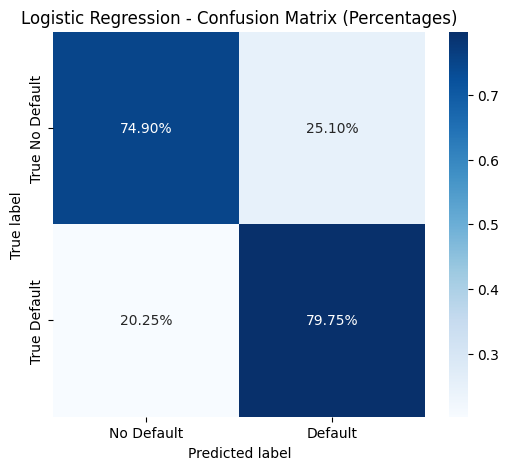

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate
evaluate_model(lr_model, X_test, y_test, model_name="Logistic Regression")

**d- Random Forest**


Random Forest Performance (Threshold = 0.2):



Per class metrics:



Confusion Matrix (Percentages per True Class):
True No Default -> Predicted No Default: 84.38% | Predicted Default: 15.62%
True Default -> Predicted No Default: 19.07% | Predicted Default: 80.93%


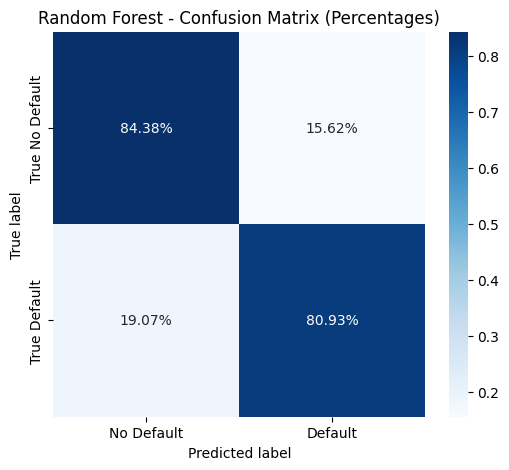

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
evaluate_model(rf_model, X_test, y_test, model_name="Random Forest")


**e- XGBoost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:41:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance (Threshold = 0.2):



Per class metrics:



Confusion Matrix (Percentages per True Class):
True No Default -> Predicted No Default: 90.46% | Predicted Default: 9.54%
True Default -> Predicted No Default: 17.16% | Predicted Default: 82.84%


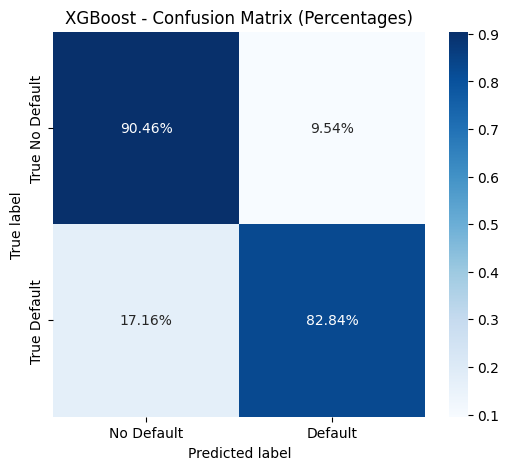

array([0, 0, 0, ..., 0, 1, 0], shape=(6517,))

In [ ]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate
evaluate_model(xgb_model, X_test, y_test, model_name="XGBoost")

**f- Light GBM**

[LightGBM] [Info] Number of positive: 5686, number of negative: 20378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 26064, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218155 -> initscore=-1.276449
[LightGBM] [Info] Start training from score -1.276449

LightGBM Performance (Threshold = 0.2):



Per class metrics:



Confusion Matrix (Percentages per True Class):
True No Default -> Predicted No Default: 90.66% | Predicted Default: 9.34%
True Default -> Predicted No Default: 17.86% | Predicted Default: 82.14%


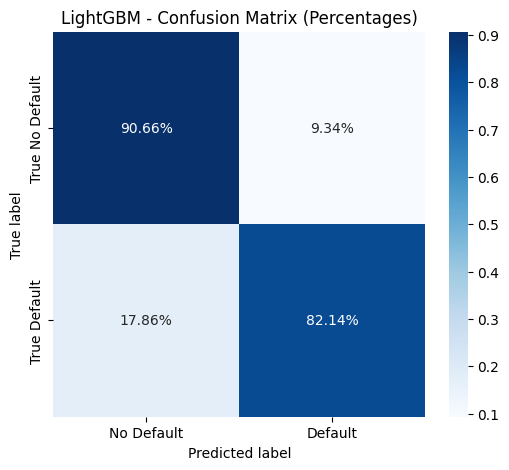

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from lightgbm import LGBMClassifier

# LightGBM
lgb_model = LGBMClassifier(random_state=42, n_estimators=100)

# Fit
lgb_model.fit(X_train, y_train)

# Evaluate using same function
evaluate_model(lgb_model, X_test, y_test, model_name="LightGBM")


###  🧪 Results summary

- **Logistic Regression** gave a decent performance and remains easy to explain.
- **Random Forest** significantly improved Recall while keeping Specificity very high.
- **XGBoost** achieved the best balance:
  - **High recall** → better detection of defaults (reducing risk).
  - **Very high specificity** → low false positive rate (protecting good customers).
  - **Good precision** → avoiding too many false alerts.

By testing different thresholds, we also showed that **XGBoost is flexible** and allows tuning between catching more defaults and protecting clients.

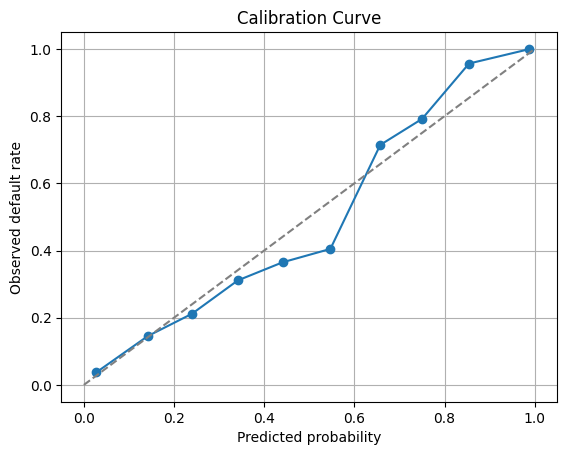

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

y_prob = xgb_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("Predicted probability")
plt.ylabel("Observed default rate")
plt.title("Calibration Curve")
plt.grid(True)
plt.show()

# 🚀 Step 5 - Advanced Model Interpretability and Validation

After establishing our baseline models and identifying XGBoost as the best performing model, it is essential to go beyond performance and understand:

- What drives the model decisions overall (global explainability).
- Why specific clients are accepted or rejected (local explainability).
- Whether the model is fair and robust (bias and stability analysis).

This step is critical for:

* Trust and transparency (Risk Managers, clients)
* Compliance (Regulators)
* Actionability (Commercial teams)

---


In [ ]:
!pip install shap

**1.a- Global Interactions (SHAP Interaction Values)**

Some features may not act independently. Let's check for interaction effects.

For example, `loan_percent_income` and `loan_int_rate` together may increase risk more significantly than alone.


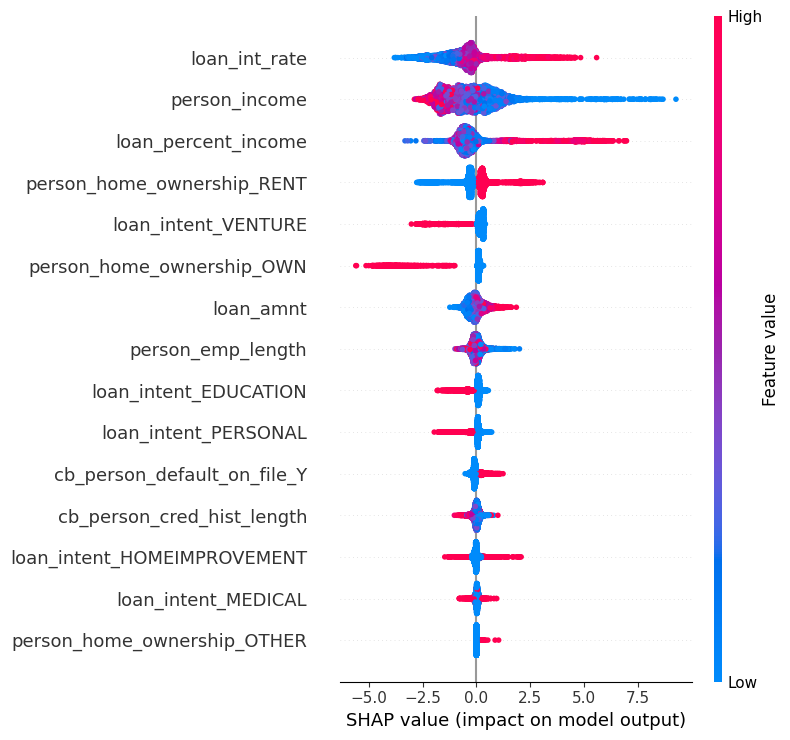

In [ ]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Global summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="dot")


**Interpretation**

- `loan_int_rate`, `loan_percent_income`, and `person_income` are key risk drivers.
- Higher loan interest rates and a high loan amount relative to income push strongly towards default.
- Higher personal income tends to reduce the default probability.

---


**1.b- Local Explanation + Multi-feature What-If (Dynamic Simulation)**

Beyond income only → let's simulate realistic changes:

- Increase income
- Reduce loan amount
- Reduce interest rate


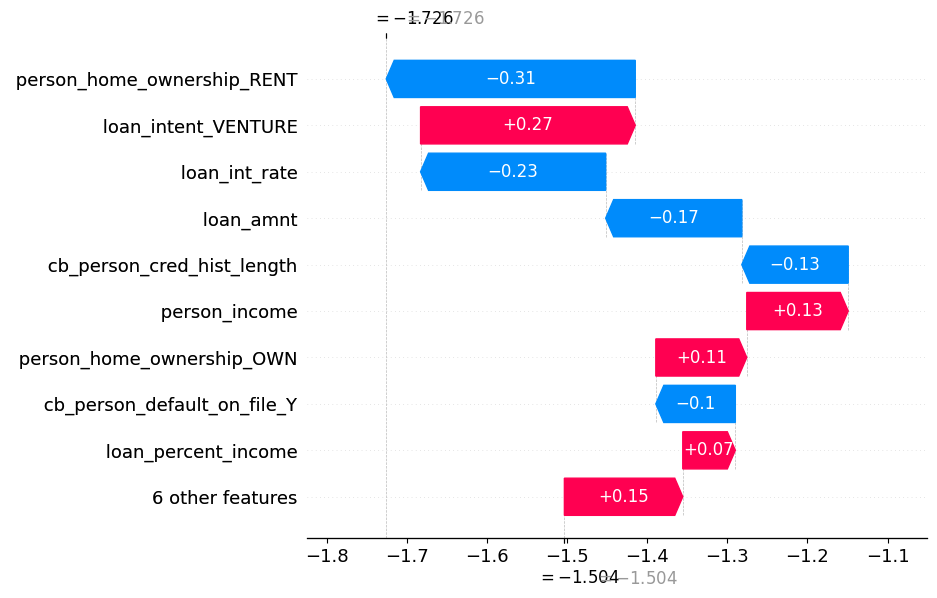

In [ ]:
import shap

# Créer un TreeExplainer (adapté pour XGBoost)
explainer = shap.TreeExplainer(xgb_model)

# Sélectionner le client 50
client_index = 50
shap_values = explainer.shap_values(X_test)

# Afficher le waterfall plot pour ce client
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[client_index],
    X_test.iloc[client_index]
)


In [ ]:
# Select instance
instance_index = 50
instance = X_test.iloc[instance_index].copy()

# Original prediction
original_proba = xgb_model.predict_proba([instance])[0][1]

# Scenario 1: Double income
instance_income = instance.copy()
instance_income['person_income'] *= 2

# Scenario 2: Reduce loan amount
instance_loan = instance.copy()
instance_loan['loan_amnt'] *= 0.5

# Scenario 3: Reduce interest rate
instance_rate = instance.copy()
instance_rate['loan_int_rate'] *= 0.8

# Predict new probabilities
proba_income = xgb_model.predict_proba([instance_income])[0][1]
proba_loan = xgb_model.predict_proba([instance_loan])[0][1]
proba_rate = xgb_model.predict_proba([instance_rate])[0][1]

print("Original:", f"{original_proba:.2%}")
print("Double Income:", f"{proba_income:.2%}")
print("Half Loan Amount:", f"{proba_loan:.2%}")
print("Lower Interest Rate:", f"{proba_rate:.2%}")


Original: 15.11%
Double Income: 5.16%
Half Loan Amount: 11.08%
Lower Interest Rate: 15.69%


**Interpretation**

- Positive changes significantly reduce default probability.
- This supports the actionability of the model → clients can be advised on how to improve acceptance chances.

---


**Interpretation**:

- The SHAP values for `person_age` do not show a clear penalization pattern for older or younger applicants.
- Most SHAP values remain around zero → suggesting no major impact on risk prediction.
- At very young ages (left of plot), there is slightly more variance and some positive SHAP values → may reflect less stable borrowers → worth monitoring but not alarming.
- No evidence of strong age bias.

---

**1.c- Stress Test → How robust is the model in tough scenarios?**

To assess the robustness of the model and portfolio, we simulated a macroeconomic shock scenario:

- **+2% increase in loan interest rates** across all clients.



In [ ]:
# Simulate +2% interest rate on all clients
stress_test = X_test.copy()
stress_test['loan_int_rate'] += 2

# Predict new risks
stress_pred = xgb_model.predict_proba(stress_test)[:, 1]

# Compare
baseline_pred = xgb_model.predict_proba(X_test)[:, 1]

stress_risky = (stress_pred >= 0.5).sum()
baseline_risky = (baseline_pred >= 0.5).sum()

print("Original risky clients:", baseline_risky)
print("Risky clients after shock:", stress_risky)
print("New risky clients added:", stress_risky - baseline_risky)


Original risky clients: 1057
Risky clients after shock: 3176
New risky clients added: 2119


**2- LIME**

In [ ]:
!pip install lime alibi

In [ ]:
import lime
import lime.lime_tabular
import numpy as np

# LIME requires the training set in original (unscaled) form if possible
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['No Default', 'Default'],
    mode='classification'
)

# Explain client n°50
client_index = 2
exp = explainer_lime.explain_instance(
    data_row=X_test.iloc[client_index],
    predict_fn=xgb_model.predict_proba,
    num_features=10
)

# Display in notebook
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

**3- Anchor**

In [ ]:
categorical_names = {}
for i, col in enumerate(X_train.columns):
    uniques = list(X_train[col].unique())
    if len(uniques) < 10:  # ou tout seuil pertinent
        categorical_names[i] = [str(v) for v in uniques]  # 🔧 convertit en string

In [ ]:
from alibi.explainers import AnchorTabular

# Définir le prédicteur
predict_fn = lambda x: xgb_model.predict(x)

# Recréer l'explainer avec noms corrigés
anchor_explainer = AnchorTabular(
    predictor=predict_fn,
    feature_names=X_train.columns.tolist(),
    categorical_names=categorical_names
)

# Adapter l'explainer aux données
anchor_explainer.fit(X_train.values, disc_perc=(25, 50, 75))

# Client à expliquer
client_index = 50
instance = X_test.iloc[client_index].values

# Explication
anchor_exp = anchor_explainer.explain(instance)

# Récupérer la classe prédite (ex : 0 = Non-default, 1 = Default)
predicted_class = int(predict_fn(instance.reshape(1, -1))[0])  # reshape nécessaire pour passer une ligne

# Mapping lisible si besoin
class_map = {0: "Non-default", 1: "Default"}

# Affichage
print("✅ Anchor Explanation")
print("Rule:", anchor_exp.anchor)
print(f"→ Predicted Class: {class_map[predicted_class]} (class {predicted_class})")
print(f"Precision: {anchor_exp.precision:.3f}")
print(f"Coverage: {anchor_exp.coverage:.4f}")


✅ Anchor Explanation
Rule: ['loan_int_rate <= 0.68', 'loan_percent_income <= -0.75']
→ Predicted Class: Non-default (class 0)
Precision: 0.982
Coverage: 0.2167


**4- Surrogate Trees**

 Surrogate Tree Accuracy (vs XGBoost): 0.8625


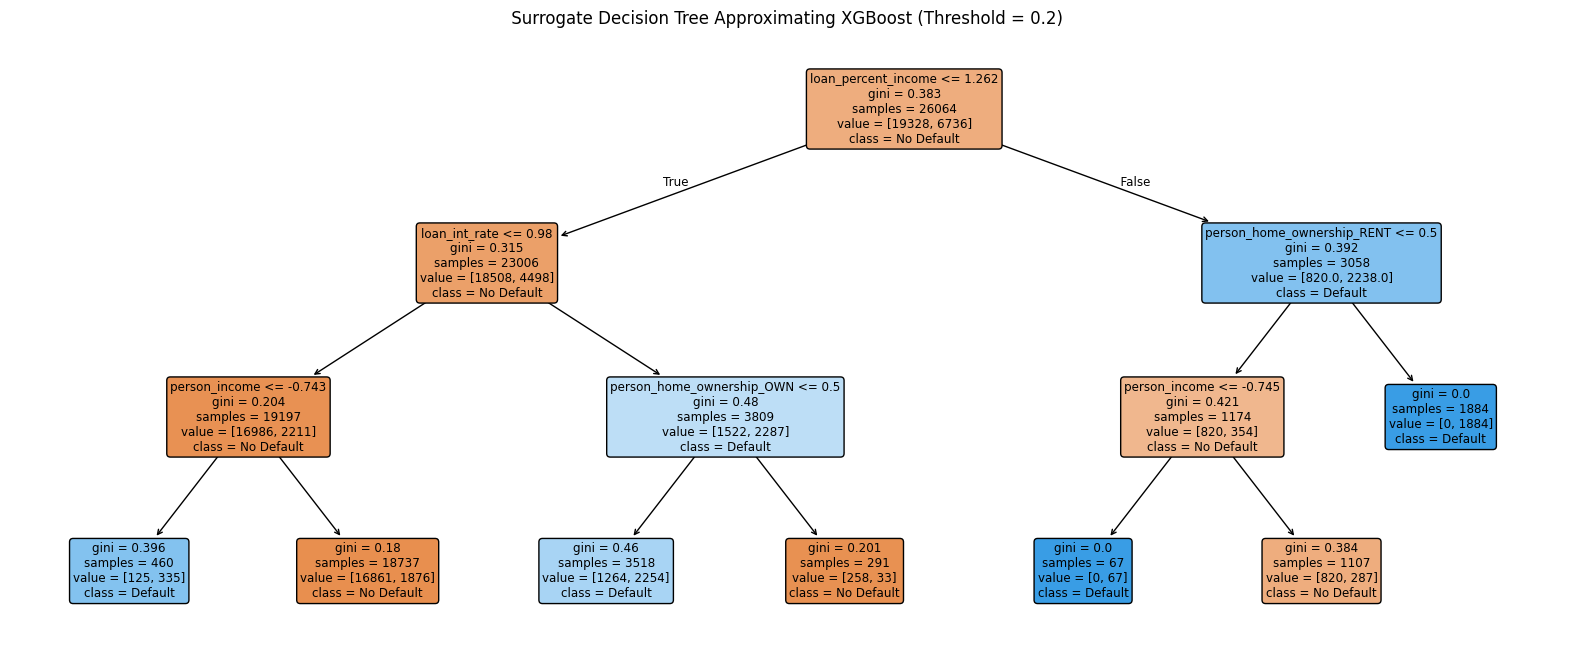

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#  Préparer les données d'entraînement
X_surrogate = X_train.copy()

#  Encoder les colonnes catégorielles (si non déjà fait)
cat_cols = X_surrogate.select_dtypes(include="object").columns.tolist()
if cat_cols:
    encoder = OrdinalEncoder()
    X_surrogate[cat_cols] = encoder.fit_transform(X_surrogate[cat_cols])

#  Cible = prédictions de XGBoost (ici, selon un seuil de 0.2)
y_surrogate_target = (xgb_model.predict_proba(X_train)[:, 1] >= 0.2).astype(int)

#  Entraîner l’arbre de surrogate
surrogate_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate_tree.fit(X_surrogate, y_surrogate_target)

#  Évaluation
y_pred_surrogate = surrogate_tree.predict(X_surrogate)
accuracy = accuracy_score(y_surrogate_target, y_pred_surrogate)
print(f" Surrogate Tree Accuracy (vs XGBoost): {accuracy:.4f}")

#  Visualisation de l’arbre
plt.figure(figsize=(20, 8))
plot_tree(
    surrogate_tree,
    feature_names=X_surrogate.columns,
    class_names=["No Default", "Default"],
    filled=True,
    rounded=True
)
plt.title(" Surrogate Decision Tree Approximating XGBoost (Threshold = 0.2)")
plt.show()


### Surrogate Tree Approximating XGBoost

The surrogate tree is a simple decision tree trained to approximate the predictions of a more complex model (here, XGBoost).

**Purpose:**
- 📖 Translate the XGBoost logic into a readable tree.
- 🔍 Understand decision boundaries and key rules learned by the model.
- 💡 Explain how the model classifies "Default" vs "No Default" based on input features.

**Note:** Unlike the GIRP tree (based on SHAP), this surrogate learns from model outputs directly.


**5- GIRP Tree**

 GIRP Tree Fidelity (vs modèle) : 0.9679


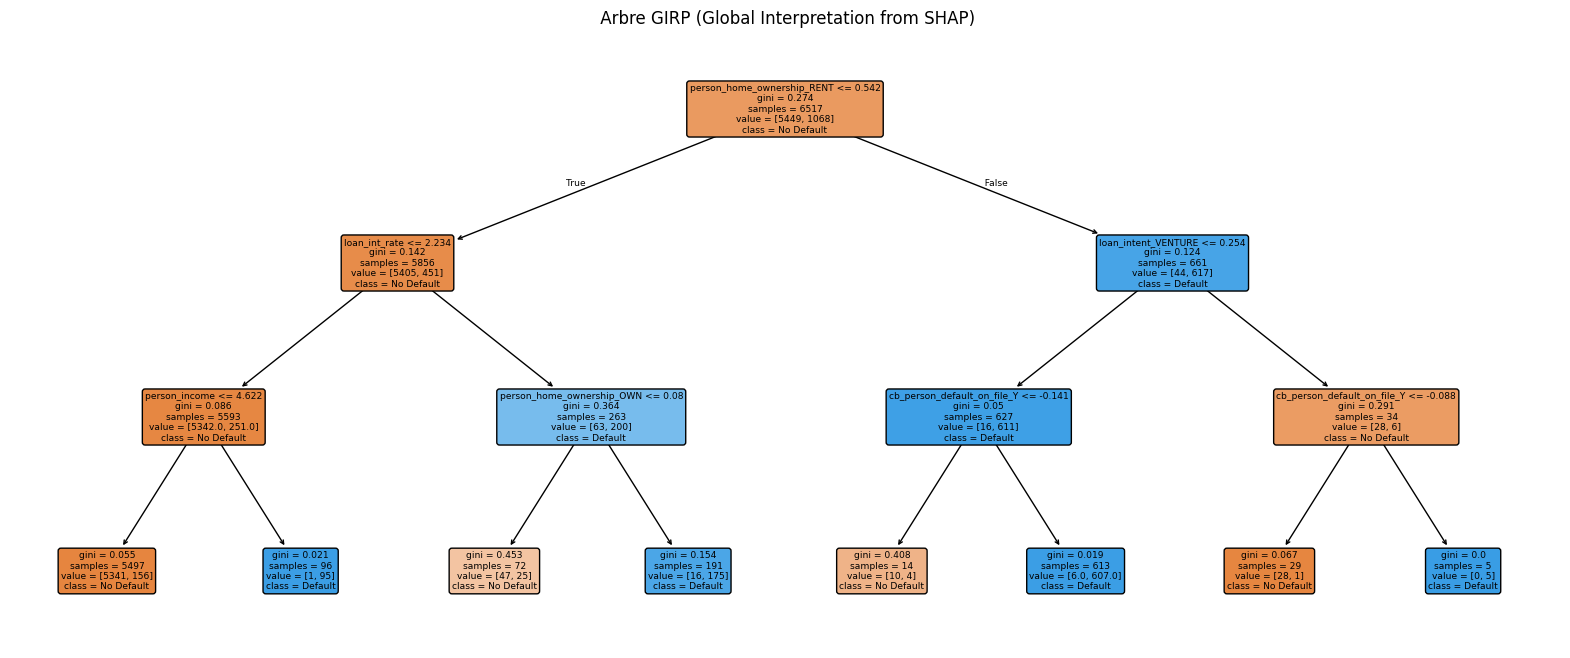

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

#  Fonction de génération d’un arbre GIRP
def plot_girp_tree(model, X_input, shap_values, class_index=1, max_depth=3):
    """
    Affiche un arbre d'interprétation global basé sur les SHAP values.
    """
    # SHAP values pour la classe 1 (défaut)
    if isinstance(shap_values, list):
        shap_contribs = shap_values[class_index]
    else:
        shap_contribs = shap_values

    shap_contribs = np.array(shap_contribs)
    if shap_contribs.ndim != 2:
        raise ValueError(f"SHAP values doivent être 2D, mais shape = {shap_contribs.shape}")

    # Prédictions du modèle
    y_preds = model.predict(X_input)

    # Surrogate tree
    girp_tree = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    girp_tree.fit(shap_contribs, y_preds)

    # Fidélité
    fidelity = accuracy_score(y_preds, girp_tree.predict(shap_contribs))
    print(f" GIRP Tree Fidelity (vs modèle) : {fidelity:.4f}")

    # Affichage
    plt.figure(figsize=(20, 8))
    plot_tree(
        girp_tree,
        feature_names=X_input.columns,
        class_names=["No Default", "Default"],
        filled=True,
        rounded=True
    )
    plt.title(" Arbre GIRP (Global Interpretation from SHAP)")
    plt.show()

#  SHAP explainer basé sur XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

#  Arbre GIRP (classe 1 = défaut)
plot_girp_tree(xgb_model, X_test, shap_values, class_index=1, max_depth=3)


### Global Interpretation via SHAP (GIRP Tree)

The GIRP tree (Global Interpretation via Recursive Partitioning) is a **surrogate decision tree** trained on **SHAP values**, not raw features.

It summarizes the model’s logic by capturing how feature contributions combine across the dataset.

**Why it matters:**
- 🔍 Highlights key decision rules used by the model.
- 📊 Shows the global impact of features on predicted default probability.
- ✅ Ensures interpretability and auditability for regulators and stakeholders.

Each split corresponds to a SHAP threshold, and each leaf reflects how the model behaves for a subpopulation of clients.


**6- Counterfactual Explanations with DiCE**


In [ ]:
from lightgbm import LGBMClassifier

# Entraîner LightGBM si ce n’est pas déjà fait
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5686, number of negative: 20378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 26064, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218155 -> initscore=-1.276449
[LightGBM] [Info] Start training from score -1.276449


LGBMClassifier(random_state=42)

In [ ]:
#  S’assurer que les features sont bien numériques (DiCE n'accepte pas les types object)
X_test = X_test.astype(float)
X_train = X_train.astype(float)

In [ ]:
# 1. Reconstituer le DataFrame avec la target
df_dice = X_test.copy()
df_dice['loan_status'] = y_test.values

# 2. Définir les variables continues
continuous_features = X_test.columns.tolist()

# 3. Créer l'objet Data de DiCE
data_dice = dice_ml.Data(
    dataframe=df_dice,
    continuous_features=continuous_features,
    outcome_name='loan_status'
)

# 4. Encapsuler le modèle LightGBM dans DiCE
model_dice = dice_ml.Model(model=lgb_model, backend='sklearn')

# 5. Instancier l'explainer avec méthode random
dice_exp = Dice(data_dice, model_dice, method='random')

# 6. Choisir un client à expliquer
client_idx = 50
query_instance = X_test.iloc[[client_idx]]

# 7. On interdit de modifier le taux d'intérêt (décision de la banque)
features_to_vary = [f for f in X_test.columns if f != 'loan_int_rate']

# 8. Générer des contre-exemples
cf = dice_exp.generate_counterfactuals(
    query_instance,
    total_CFs=3,
    desired_class="opposite",
    features_to_vary=features_to_vary,
    proximity_weight=0.7
)

# 9. Affichage
cf.visualize_as_dataframe()


100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

Query instance (original outcome : 0)


person_income  person_emp_length  loan_amnt  loan_int_rate  \
0      -0.108432           0.056763   0.001681       0.863321   

   loan_percent_income  cb_person_cred_hist_length  \
0            -0.282857                    1.034735   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                          0.0                        0.0   

   person_home_ownership_RENT  loan_intent_EDUCATION  \
0                         0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  cb_person_default_on_file_Y  loan_status  
0                  0.0                          1.0            0


Diverse Counterfactual set (new outcome: 1)


person_income  person_emp_length  loan_amnt  loan_int_rate  \
0      -0.108432           7.077463   0.001681       0.863321   
1      -0.108432           7.343882   0.001681       0.863321   
2      -0.108432           3.630433   0.001681       0.863321   

   loan_percent_income  cb_person_cred_hist_length  \
0            -0.282857                    1.034735   
1            -0.282857                    1.034735   
2            -0.282857                    1.034735   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   

   person_home_ownership_RENT  loan_intent_EDUCATION  \
0                         0.0                    0.0   
1                         0.0                    0.0   
2                         0.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  1.0                   0.0   
1                          0.0                  1.0                   0.0   
2                          0.9                  1.0                   0.0   

   loan_intent_VENTURE  cb_person_default_on_file_Y  loan_status  
0                  0.0                          1.0            1  
1                  0.0                          1.0            1  
2                  0.0                          1.0            1

### Counterfactual Explanations with DiCE

To enhance the interpretability and **actionability** of our model, we use **DiCE** (Diverse Counterfactual Explanations) to answer a key business question:

> *"What minimal changes could make this client get their loan approved?"*

#### 🧪 Experiment setup:

- **Initial client**: Predicted as risky (loan_status = 0).
- **Counterfactual goal**: Find profiles that would be classified as **safe (loan_status = 1)**.
- **Constraints**:
  - The **interest rate is fixed** (by the bank) and not allowed to change.
  - Only features under the applicant's control can vary (e.g., employment length, income).

#### 🧠 Result analysis:

- All counterfactuals kept the **same income and loan amount**.
- The most consistent change across accepted profiles is an **increase in `person_emp_length`** (employment length).
- This suggests that the model heavily relies on job stability to approve credit requests.

#### ✅ Insight:

> For this specific client, increasing employment length (e.g., by waiting or providing more documentation) could directly improve loan approval chances.

This kind of explanation can be directly communicated to the client or used by advisors to guide decision-making.


# 🧠 Step 6 - Native Explainability with Explainable Boosting Machine (EBM)

While XGBoost combined with SHAP offers post hoc explanations, it remains a black-box model.  
To go further in terms of interpretability, we deploy the **Explainable Boosting Machine (EBM)**: a state-of-the-art **glassbox model** developed by Microsoft Research.

EBM is based on enhanced Generalized Additive Models (GAMs), and provides **built-in global and local explainability** with minimal computational cost.

---

## 💡 Why EBM?

- **Interpretable by design** → no need for SHAP or LIME.
- **Competitive performance** → often matches XGBoost and Random Forest.
- **Readable explanations** → easy to communicate with risk managers and clients.
- **Audit-ready** → meets the standards of regulatory compliance (e.g., BCE, ACPR, GDPR).
- **Interaction-aware** → automatically captures key pairwise interactions.

---

In this section, we will:

- Train an EBM model on the same dataset.
- Evaluate its predictive performance.
- Analyze its native explanations (global + local).
- Compare it with black-box models like XGBoost.



In [ ]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 18.8 MB/s eta 0:00:00
ERROR: Operation cancelled by user


**a- EBM Training**

In [ ]:
!pip install interpret

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier

# Initialisation EBM (optimisé pour vitesse et lisibilité)
ebm = ExplainableBoostingClassifier(
    random_state=42,
    max_bins=128,        # Réduction du nombre de coupures par variable (plus rapide)
    interactions=5,      # Active uniquement les 5 interactions les plus pertinentes
    outer_bags=4,        # Réduction du nombre de modèles en bagging (par défaut : 8)
    inner_bags=0         # Désactive le cross-validation interne (gain de temps)
)

# Entraînement
ebm.fit(X_train, y_train)


ExplainableBoostingClassifier(interactions=5, max_bins=128, outer_bags=4)

**b- Evaluation**


Explainable Boosting Machine (EBM) Performance (Threshold = 0.2):



Per class metrics:



Confusion Matrix (Percentages per True Class):
True No Default -> Predicted No Default: 89.05% | Predicted Default: 10.95%
True Default -> Predicted No Default: 17.02% | Predicted Default: 82.98%


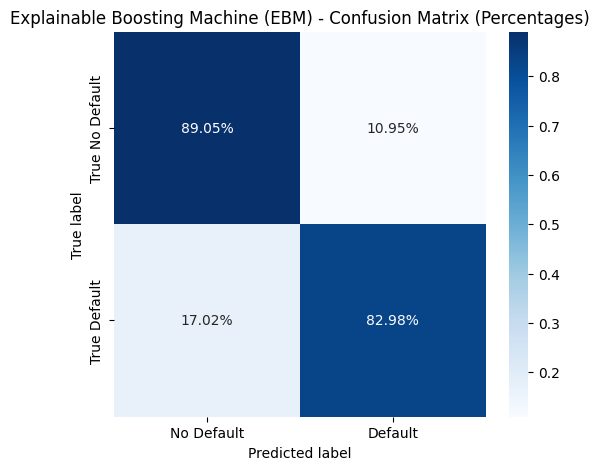

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
evaluate_model(ebm, X_test, y_test, model_name="Explainable Boosting Machine (EBM)", threshold=0.2)

In [ ]:
from interpret import show

# Générer l’explication globale
ebm_global = ebm.explain_global()

# Affichage compatible Colab
show(ebm_global, notebook=True)


In [ ]:
# Obtenir l'explication locale du client à l'index 49
ebm_local_50 = ebm.explain_local(X_test[49:50], y_test[49:50])

# Affichage dans le notebook
from interpret import show
show(ebm_local_50)
